<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

# Content
#### 1. [Load Data into Jupyter Notebook](#part1)
#### 2. [Data Preprocessing](#part2)
#### 3. [Train and Test Split](#part3)
#### 4. [Missing Value Imputation](#part4)
#### 5. [Categorical Data Encoding](#part5)
#### 6. [Variable Discretization /Binning](#part6)
#### 7. [Feature Engineer](#part7)
#### 8. [Linear Regression Modelling](#part8)
#### 9. [Report](#part9)

In [1]:
# import the pacakges
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# import feature-engine imputer
import feature_engine.imputation as mdi
from feature_engine.imputation import CategoricalImputer

# import feature-engine encoders
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import OrdinalEncoder

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

# transformer
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import BoxCoxTransformer

# the scaler
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# the capper
from feature_engine.outliers import Winsorizer

# feature engineering
from sklearn.preprocessing import PolynomialFeatures

# others
import datetime


### Step 1: Load Data into Jupyter Notebook <a id="part1"></a>

In [2]:
# load data
data = pd.read_csv('./supermarket.csv')
data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Looking at the values for each column
for column in data:
    print(data[column].value_counts())

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat             

### Step 2: Data Preprocessing <a id="part2"></a>

In [4]:
# Check for duplicates
num_duplicates = data.duplicated().sum()
num_duplicates

0

In [5]:
# Simplifying data in column Item_Fat_Content
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat'})
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'reg': 'Regular'})
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'low fat': 'Low Fat'})


In [6]:
# Checking for missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# Looking into missing data in column Item_Weight to see if there is any relationship
data[data['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [8]:
# Mapping item identifiers to their respective weights based on non-null values
data2 = data[data['Item_Weight'].notna()]
data2.groupby('Item_Identifier')
Item_Weight_Dictionary = {}
Item_Weight_Dictionary = pd.Series(data2.Item_Weight.values,index=data2.Item_Identifier).to_dict()
data['Item_Weight'] = data['Item_Identifier'].map(Item_Weight_Dictionary)
data[data['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [9]:
# Looking into missing data in column Outlet_Size to see if there is any relationship
data[data['Outlet_Size'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


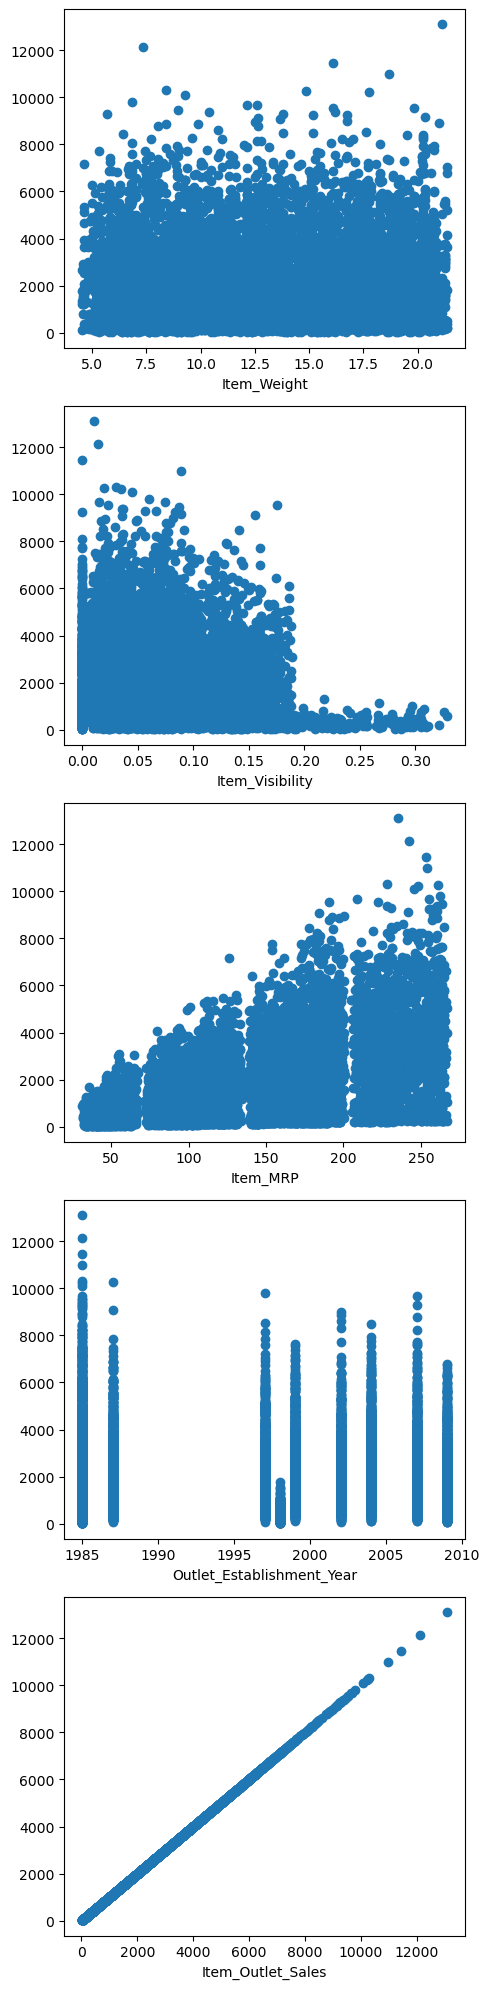

In [10]:
# Looking at the distribution of numerical variables to see their relationship
num_cols = [n for n in data.columns if data[n].dtypes!='O']
fig, axs = plt.subplots(len(num_cols), figsize=(5, 4 * len(num_cols)))

# Plot scatter plots for each numeric column
for i, col in enumerate(num_cols):
    axs[i].scatter(data[col], data['Item_Outlet_Sales'])
    axs[i].set_xlabel(col)

plt.tight_layout()

In [11]:
# Creating a new column No_of_Years
data['No_of_Years'] = datetime.datetime.now().year - data['Outlet_Establishment_Year']
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,No_of_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,36


In [12]:
# Dropping unnecessary Numerical Variables
data=data.drop('Item_Weight',axis=1)
data=data.drop('Outlet_Establishment_Year',axis=1)

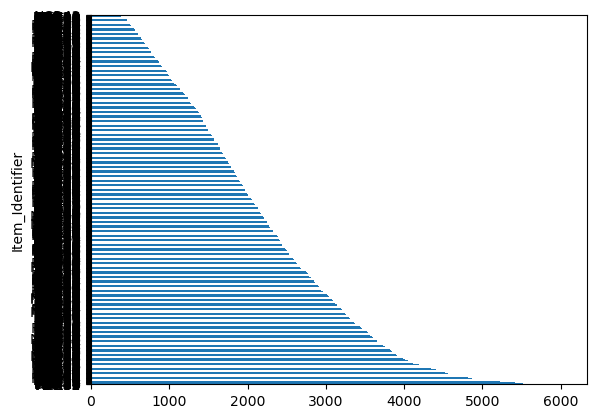

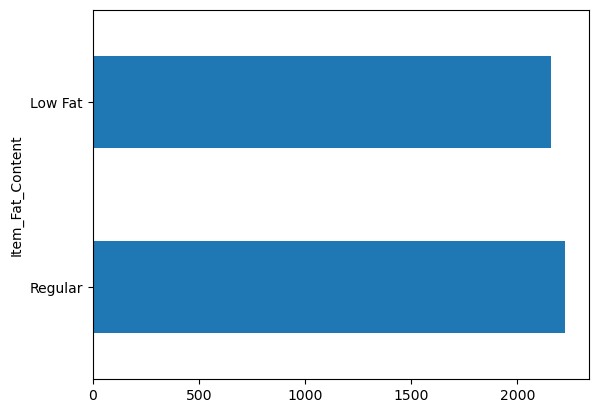

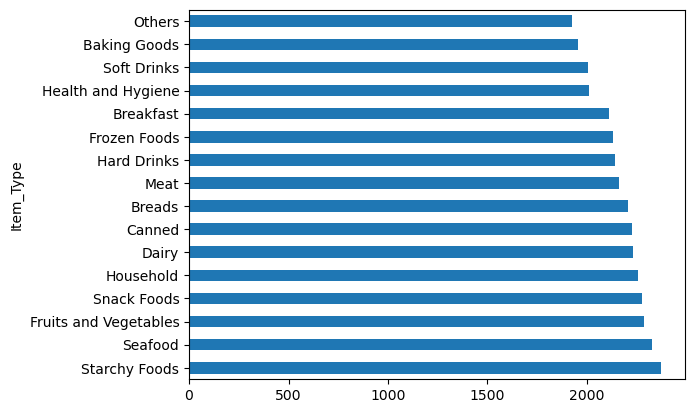

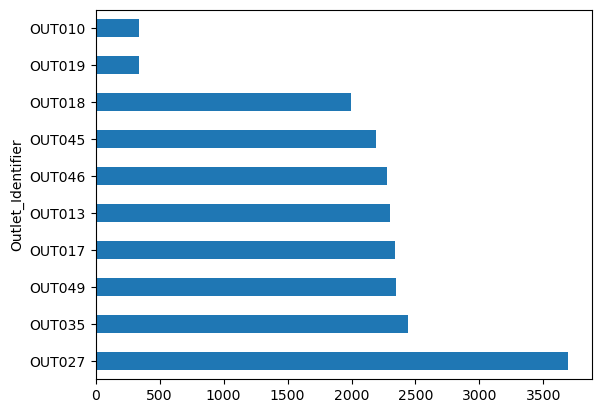

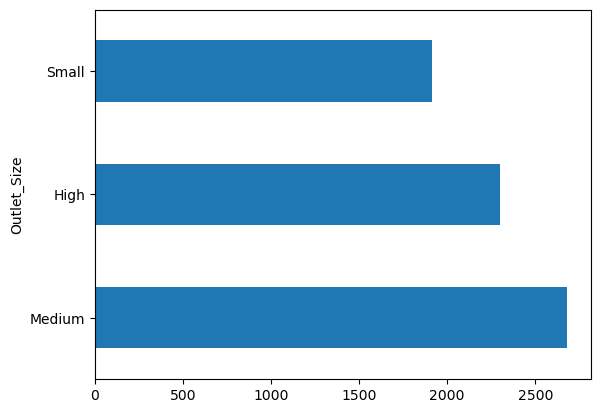

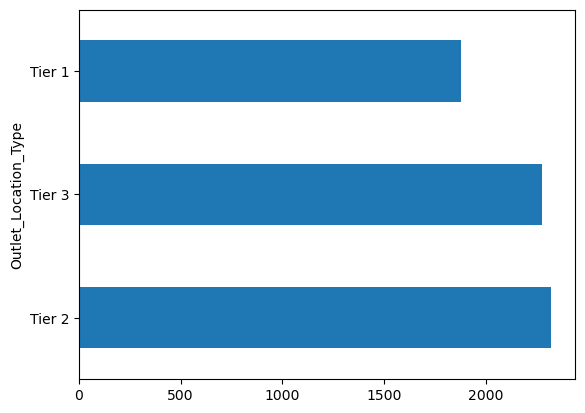

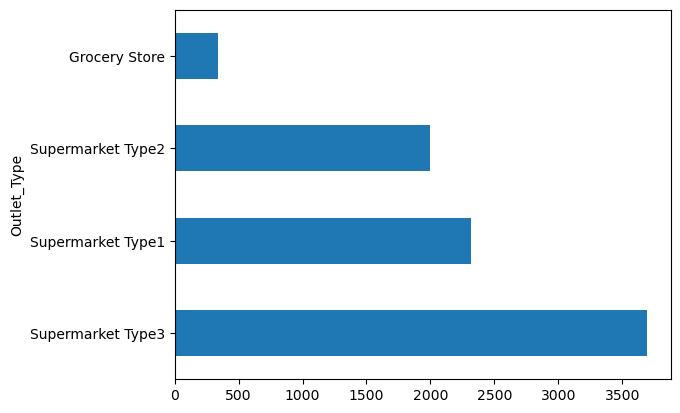

In [13]:
# Looking at the composition of categorical variables to see their relationship
cat_cols = [c for c in data.columns if data[c].dtypes=='O']
cat_cols
for x in cat_cols:
    data.groupby(x)['Item_Outlet_Sales'].mean().sort_values(ascending=False).plot(kind='barh')
    plt.show()


In [14]:
# Dropping unnecessary Categorical Variables
data=data.drop('Item_Fat_Content',axis=1)

### Step 3: Train and Test Split <a id="part3"></a>

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(
    data.drop("Item_Outlet_Sales",axis=1),data["Item_Outlet_Sales"],test_size=0.3, random_state = 0)

X_train.shape, X_test.shape,Y_train.shape,Y_test.shape

((5966, 9), (2557, 9), (5966,), (2557,))

### Step 4: Missing Value Imputation <a id="part4"></a>

In [16]:
# using frequent imputation transformer for the missing values in column Outlet_size
mode_imputer = mdi.CategoricalImputer(variables=['Outlet_Size'], imputation_method = 'frequent')
mode_imputer.fit(X_train)

# dictionary with the mappings for each variable
mode_imputer.imputer_dict_

# transform the data for X_train and X_test
X_train = mode_imputer.transform(X_train)
X_test = mode_imputer.transform(X_test)

In [17]:
# # adding bespoke category for the missing values in column Outlet_size
# imputer = CategoricalImputer(variables=['Outlet_Size'])
# imputer.fit(X_train)

# # transform the data for X_train and X_test
# X_train = imputer.transform(X_train)
# X_test = imputer.transform(X_test)

### Step 5: Categorical Data Encoding <a id="part5"></a>

In [18]:
X_train=X_train.drop('Item_Identifier',axis=1)
X_test=X_test.drop('Item_Identifier',axis=1)

In [19]:
# Categorizing different variables with different encoding methods
ohe_var=['Item_Type',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Outlet_Identifier']
# oe_var=['Outlet_Identifier']
ooe_var=['Outlet_Size'] 

In [20]:
# One hot encoding
ohe_enc = OneHotEncoder(variables=ohe_var,top_categories=None)
ohe_enc.fit(X_train)
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

In [21]:
# # Ordinal encoding
# ordinal_enc = OrdinalEncoder(encoding_method='arbitrary',variables=oe_var)
# ordinal_enc.fit(X_train)
# ordinal_enc.fit(X_test)
# X_train = ordinal_enc.transform(X_train)
# X_test = ordinal_enc.transform(X_test)

In [22]:
# # Ordered Ordinal encoding (Feature Engine)
# ordinal_enc = OrdinalEncoder(encoding_method='ordered',variables=ooe_var)
# ordinal_enc.fit(X_train,Y_train)
# ordinal_enc.fit(X_test,Y_test)
# X_train = ordinal_enc.transform(X_train)
# X_test = ordinal_enc.transform(X_test)
# ordinal_enc.encoder_dict_

In [23]:
# Ordered Ordinal encoding (Pandas)
ordinal_mapping = {'Missing': 0, 'Small': 1, 'High': 3, 'Medium': 2}
X_train['Outlet_Size'] = X_train['Outlet_Size'].map(ordinal_mapping)
X_test['Outlet_Size'] = X_test['Outlet_Size'].map(ordinal_mapping)

### Step 6: Variable Discretization /Binning <a id="part6"></a>

In [24]:
data.describe()

,Item_Visibility,Item_MRP,Item_Outlet_Sales,No_of_Years
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,2181.288914,25.168133
std,0.051598,62.275067,1706.499616,8.371760
min,0.000000,31.290000,33.290000,14.000000
25%,0.026989,93.826500,834.247400,19.000000
50%,0.053931,143.012800,1794.331000,24.000000
75%,0.094585,185.643700,3101.296400,36.000000
max,0.328391,266.888400,13086.964800,38.000000


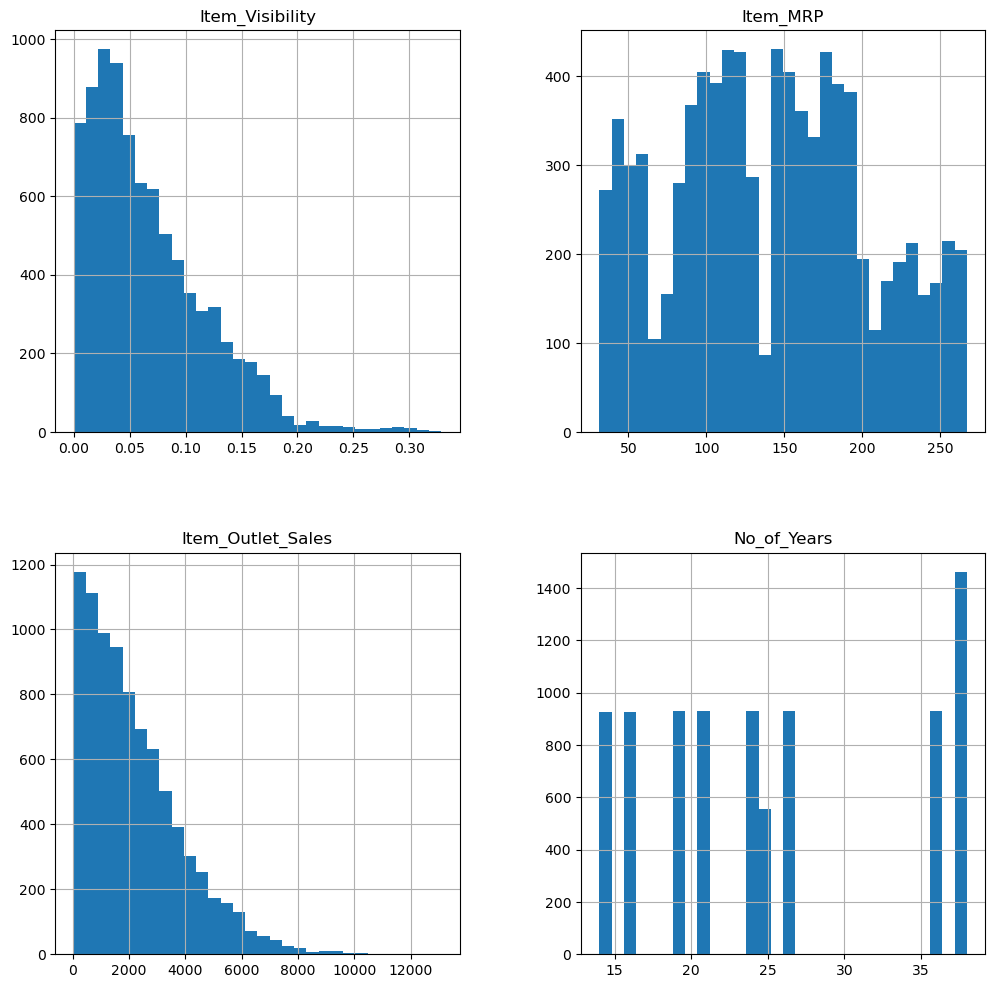

In [25]:
# Display the distribution of numerical variables through Binning
num_cols = [n for n in data.columns if data[n].dtypes!='O']
data[num_cols].hist(bins=30, figsize=(12,12))
plt.show()

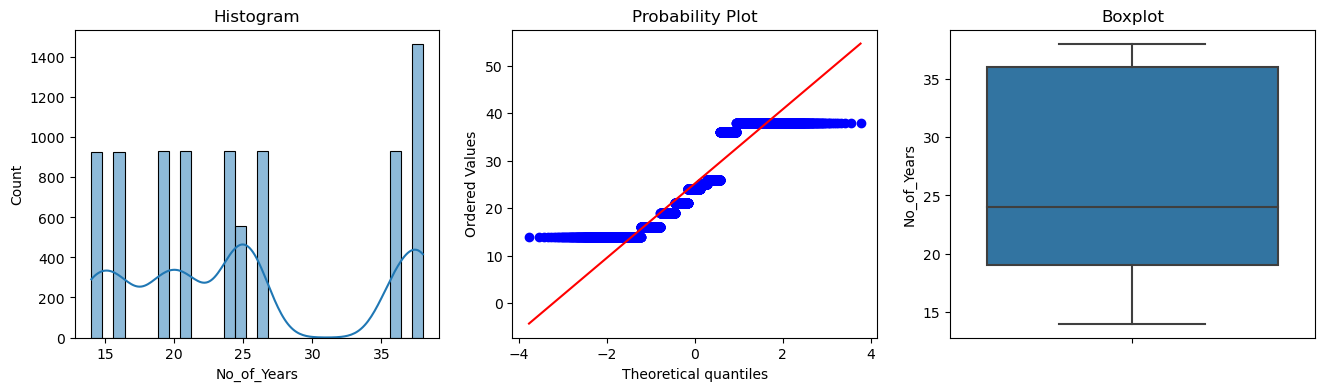

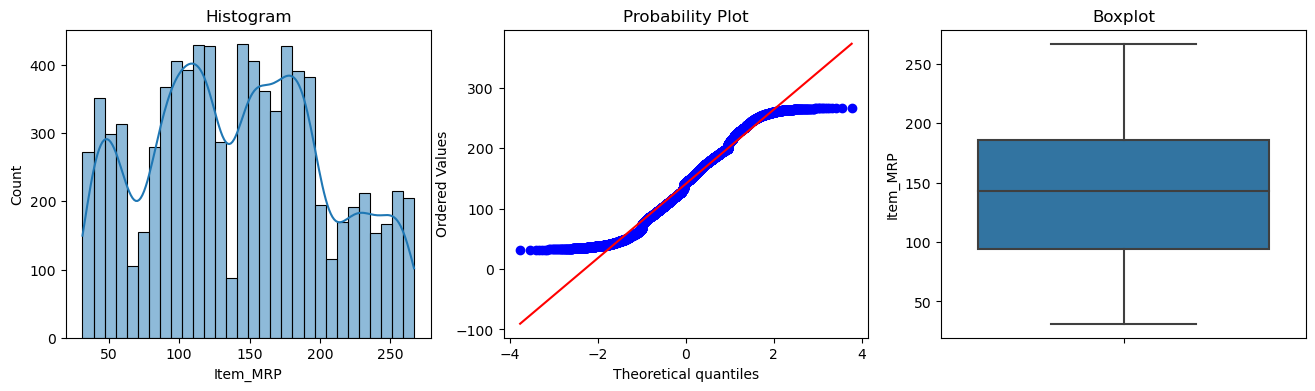

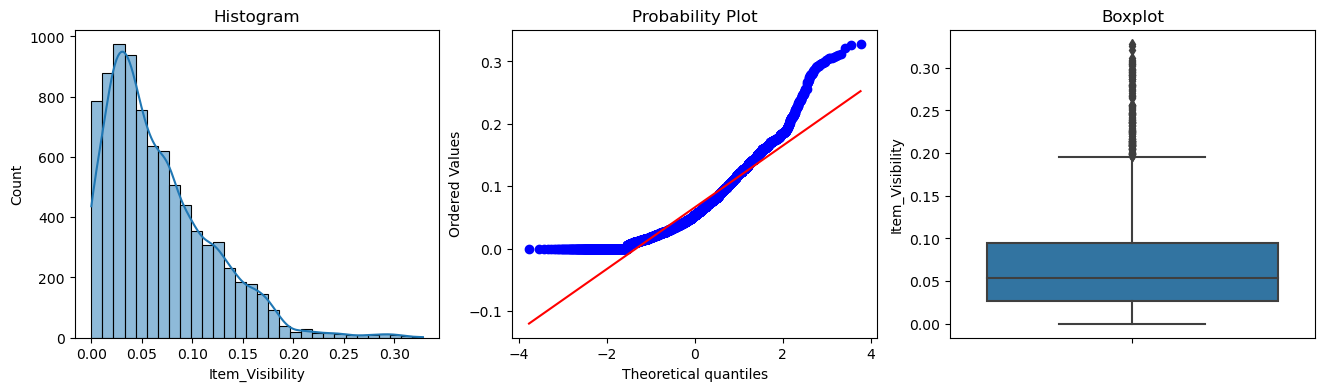

In [26]:
# Creating function diagnostic_plots
def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30,kde=True)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')


#Plotting Graphs    
diagnostic_plots(data, 'No_of_Years')
diagnostic_plots(data, 'Item_MRP')
diagnostic_plots(data, 'Item_Visibility')

In [27]:
# # Dealing with Outliers (Winsorization)
# windsorizer = Winsorizer(capping_method='gaussian', # choose iqr for skewed or gaussian for normal
#                           tail='right', # cap left, right or both tails 
#                           fold=3,
#                           variables=['Item_Visibility'])

# windsorizer.fit(data)

# data_new = windsorizer.transform(data)
# data_new['Item_Visibility'].hist(bins=30, figsize=(6,6))
# plt.show()

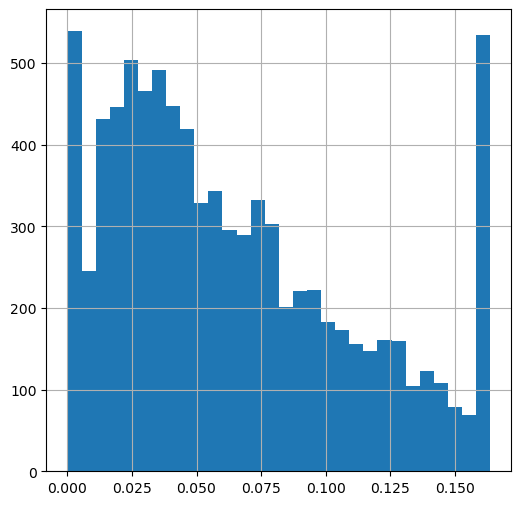

In [28]:
# Dealing with Outliers (Capping)
windsorizer = Winsorizer(capping_method='quantiles', # choose iqr for skewed or gaussian for normal
                          tail='right', # cap left, right or both tails 
                          fold=3,
                          variables=['Item_Visibility'])

windsorizer.fit(data)

data_new = windsorizer.transform(data)
data_new['Item_Visibility'].hist(bins=30, figsize=(6,6))
plt.show()

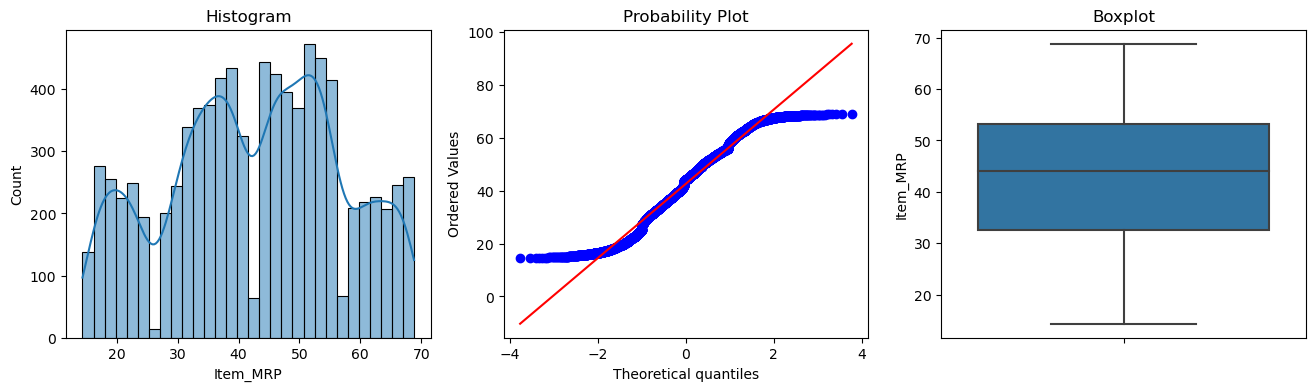

In [29]:
# BoxCox Transformer
# initialize the transformer
bct = BoxCoxTransformer(variables=['Item_MRP'])

# fit transformer to data set
bct.fit(data)
data_tf = bct.transform(data)
diagnostic_plots(data_tf, 'Item_MRP')

In [30]:
# # Log transformer
# # initialize the transformer
# lt = LogTransformer(variables=['Item_MRP'])

# # fit transformer to data set
# lt.fit(data)
# data_tf = lt.transform(data)
# diagnostic_plots(data_tf, 'Item_MRP')

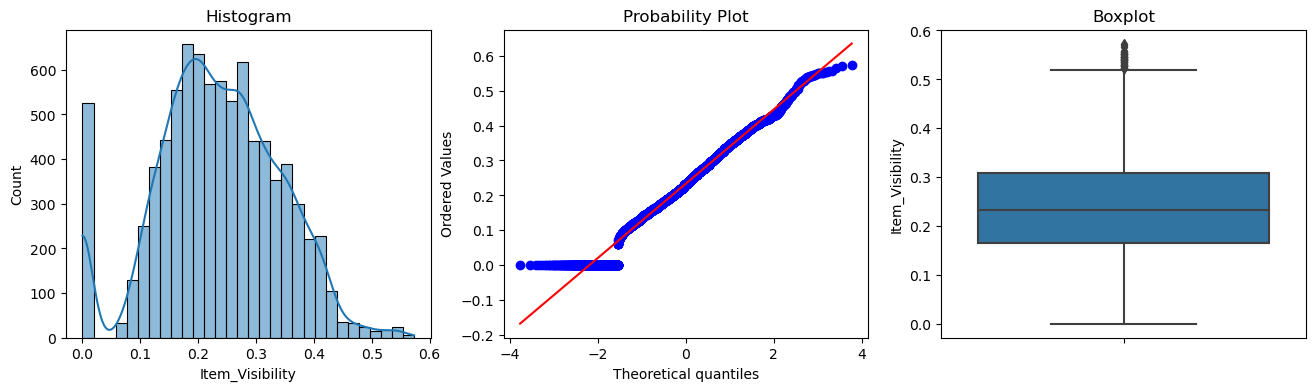

In [31]:
# Power transformer
# initialize the transformer
et = PowerTransformer(variables=['Item_Visibility'], exp=1/2)

# fit transformer to data set
et.fit(data)
data_tf = et.transform(data)
diagnostic_plots(data_tf, 'Item_Visibility')

In [32]:
# # Log transformer
# # initialize the transformer
# lt = LogTransformer(variables=['Item_Visibility'])

# # fit transformer to data set
# lt.fit(data)
# data_tf = lt.transform(data)
# diagnostic_plots(data_tf, 'Item_Visibility')

In [33]:
X_train.head()

,Item_Visibility,Item_MRP,Outlet_Size,No_of_Years,Item_Type_Snack Foods,Item_Type_Fruits and Vegetables,Item_Type_Household,Item_Type_Dairy,Item_Type_Hard Drinks,Item_Type_Canned,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT017,Outlet_Identifier_OUT027,Outlet_Identifier_OUT019,Outlet_Identifier_OUT035,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT018,Outlet_Identifier_OUT045,Outlet_Identifier_OUT049
88,0.123116,95.6436,1,26,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6813,0.043809,146.8418,2,16,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4046,0.072317,160.7920,2,38,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8194,0.299098,157.8630,1,38,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8293,0.080278,47.2718,1,19,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
X_test.head()

,Item_Visibility,Item_MRP,Outlet_Size,No_of_Years,Item_Type_Snack Foods,Item_Type_Fruits and Vegetables,Item_Type_Household,Item_Type_Dairy,Item_Type_Hard Drinks,Item_Type_Canned,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT017,Outlet_Identifier_OUT027,Outlet_Identifier_OUT019,Outlet_Identifier_OUT035,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT018,Outlet_Identifier_OUT045,Outlet_Identifier_OUT049
4931,0.089960,159.5604,2,21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4148,0.009535,64.5510,2,38,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7423,0.017742,129.6626,2,16,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4836,0.000000,143.1154,2,16,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
944,0.049264,195.0478,3,36,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Step 7: Feature Engineer <a id="part7"></a>

In [35]:
# # Standardization
# # set up the scaler
# scaler = StandardScaler()

# # fit the scaler to the train set, it will learn the parameters
# scaler.fit(X_train)

# # transform train and test sets
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [36]:
# MinMax
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# let's transform the returned NumPy arrays to dataframes
# insert code here
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

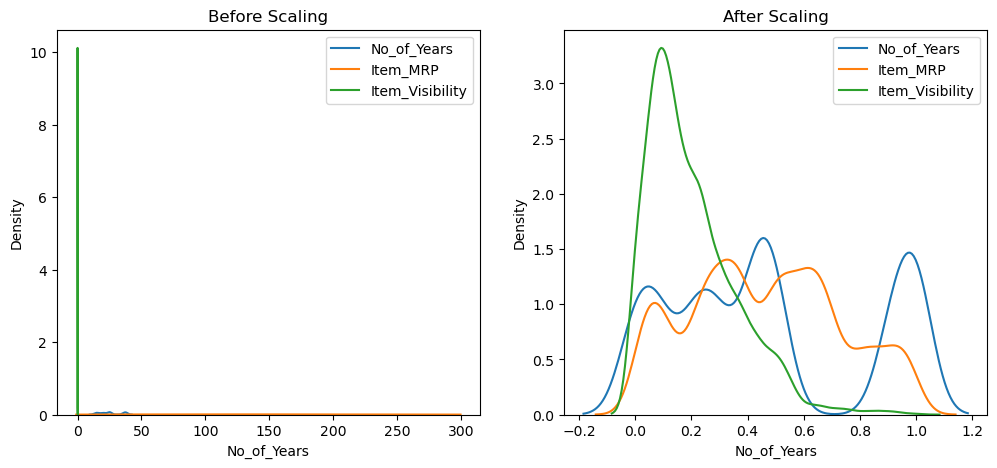

In [37]:
# Compare the variable distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['No_of_Years'], ax=ax1, label ='No_of_Years')
sns.kdeplot(X_train['Item_MRP'], ax=ax1, label ='Item_MRP')
sns.kdeplot(X_train['Item_Visibility'], ax=ax1, label ='Item_Visibility')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['No_of_Years'], ax=ax2, label ='No_of_Years')
sns.kdeplot(X_train_scaled['Item_MRP'], ax=ax2, label ='Item_MRP')
sns.kdeplot(X_train_scaled['Item_Visibility'], ax=ax2, label ='Item_Visibility')
ax2.legend()
plt.show()

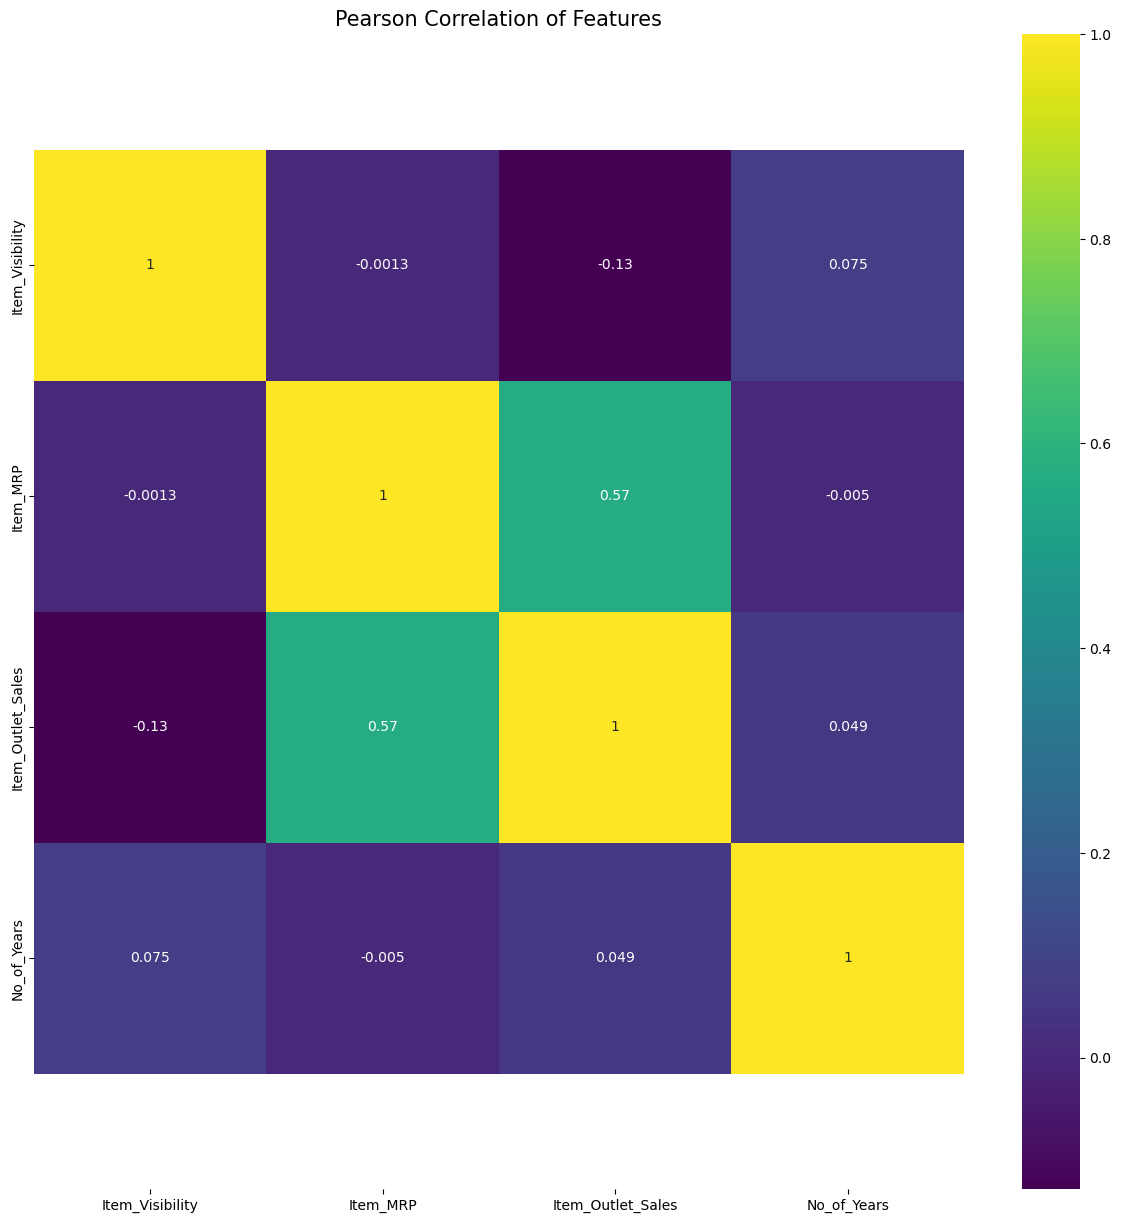

In [38]:
# Heatmap: visualize the correlation between any two features / variables
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(data[num_cols].astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [39]:
# Polynomial Expansion
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

poly.fit(X_train)

X_train = poly.transform(X_train)
X_test = poly.transform(X_test)


### Step 8: Linear Regression Modelling <a id="part8"></a>

Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).
### Building and Evaluating the Model
In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Mean Square Error (MSE): The MSE is the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of MSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

In [40]:
# assign your fully cleaned and transformed data contained within your versions of 
# X_train_student_final_premodel_version, X_test_student_final_premodel_version,
# y_train_student_final_premodel_version and y_test_student_final_premodel_version into
# the prepared variables below, for a simple linear regression model

In [41]:
X_train_student_final_premodel_version = X_train
X_test_student_final_premodel_version = X_test 
y_train_student_final_premodel_version = Y_train
y_test_student_final_premodel_version = Y_test

In [42]:
X_train_final = X_train_student_final_premodel_version
X_test_final = X_test_student_final_premodel_version

y_train_final = y_train_student_final_premodel_version
y_test_final = y_test_student_final_premodel_version

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [44]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_mse: 1089744.9251614045 
 test_mse: 1219659.5373992522
train_r-sq: 0.61817448005972 
 test_r-sq: 0.5994658156975423


## Report <a id="part9"></a>

### Introduction
This report explores the data wrangling process using the real-world dataset "Supermarket Sales Forecast." The goal is to prepare and transform the unprocessed data into a format that will work for modelling and analysis. The first section of the report introduces data wrangling as a critical phase of data analysis. The "Supermarket Sales Forecast" dataset is then described in general, along with its goal and intended predictions.

The report will then move on to describe the various data wrangling methods that will be used. These methods include investigating the dataset to understand its structure and spot any problems with the data's quality, handling missing data with imputation techniques, addressing errors and inconsistencies with data cleaning, and carrying out data transformation procedures like encoding and scaling.

Subsequently, the essay discusses the step of developing a straightforward linear regression model to forecast product sales at supermarket locations after the data wrangling phase is complete. The dataset will be divided into training and testing sets, and measures like mean squared error or R-squared will be used to assess the model's performance.
The report focuses on how crucial documentation is for the data wrangling process because it enables others to verify the findings. The report ends by underlining the importance of data wrangling in preparing data for analysis and modelling as well as its potential to produce insightful recommendations for improving grocery sales performance.


### Explore the Data
Just like a typical supermarket dataset, it includes variables such as outlet identifier, establishment year, item weight, item fat content, item visibility, item type, item MRP, outlet size, outlet location type, outlet type, and item outlet sales. In this section, we will explore the relationship among these variables to better understand the factors that affect sales.

Now, we will explore the thought process behind the relationship of each variable and item outlet sales. Although it acts as a unique store ID and helps in differentiating various outlets, the outlet identifier is not directly related to other features. To determine whether the establishment year influences sales performance, the store's age is compared with item outlet sales.  Factors like packing, transportation costs, and customer preferences, item weight may have an indirect impact on sales. To ascertain whether low-fat items are preferred by consumers and how this affects purchasing decisions, the item's fat content is analysed. It is anticipated that item visibility, which is the percentage of display space given to a product, will have a favourable effect on sales. To understand the significance of product placement, the relationship between item visibility and item outlet sales is investigated. The item type categorization helps identify popular product categories that contribute significantly to sales. To ascertain the impact of various product categories, the relationship between item type and item outlet sales is examined. Product prices also known as item MRP is examined to determine whether certain price points attract buyers or whether more expensive products create more sales. To find out whether larger stores have a competitive advantage in terms of sales performance, outlet size—which reflects the ground surface covered by a store—is analysed. To understand the impact of the outlet site type on customer behaviour and purchasing habits, it is necessary to know the type of city in which a store is located. Just like item type, outlet type is analysed to better understand how store types—grocery stores, supermarkets—affect sales and consumer preferences.

After gaining a clear understanding of the factors that may or may not impact item outlet sales, I proceeded to clean the data (which will be explained in the following section) before exploring its relationship with every variable. This was done to ensure unbiased relationships and conclusions. To facilitate easy reference, I categorized the variables into numerical and categorical variables. Generally, most variables do have a distinct relationship with item outlet sales excluding the following. For the numerical variables, I observed that item weight does not have a direct correlation with item outlet sales, and outlet establishment year is a discrete variable. Therefore, I decided to drop the item weight column. Instead, I created a new column called "No_of_Years," which represents the outlet establishment year subtracted from the current year. Regarding the categorical variables, I found that item fat content did not exhibit a significant relationship with item outlet sales. Consequently, I also dropped this variable from further analysis.


### Cleanse the Data
Not all data given is clean and perfect for analysis. It often contains errors or inconsistencies. Thus, in this section, we will explore how data cleaning is performed, an essential step to ensure accurate and reliable data, enabling a more accurate and meaningful relationship.

Firstly, I loop through the values under each column to identify missing values, duplicate records, and inconsistent formatting. Through this step, I found out that under column item fat content exist inconsistencies regarding the naming of Low Fat and Regular. As such, I proceeded to replace the data in the column from ‘LF’ to ‘Low Fat’, ‘reg’ to ‘Regular’ and ‘low fat’ to ‘Low Fat’. With that, the dataset becomes cleaner for further analysis or modelling, ensuring uniformity and consistency in the item fat content column.

Next, the number of missing values is calculated for each column, and I found out that only the item weight column and the outlet size column contain missing values. As a result, I narrowed down to the null values of each column to look for potential patterns or relationships associated with the missing values. Through this step, I found out that the missing values for the item weight column are all under outlets which were established in the year 1985. Hence, I handled missing values in the item weight column by creating a dictionary that maps item identifiers to their respective weights based on non-null values. It then replaces the missing values in the item weight column using dictionary mapping. Regarding the outlet size column, there isn't an obvious pattern or relationship associated with the missing values. With that being said, I proceeded to do data exploration (explained in the previous section) before performing missing value imputation. I narrowed down to frequent imputation and adding a bespoke category. Ultimately, I used frequent imputation as I felt that adding a bespoke category may increases the cardinality of the variable, potentially affecting the model's performance.

Lastly, dealing with outliers. To begin with, I created diagnostic plots for all the numerical variables to look at their distribution. Through this step, I found out that item visibility data is right skewed and contains anomalies. With that in mind, thought of winsorization and capping techniques. However, what made me choose the capping technique ultimately was due to the skewness of the data. Executing this step helps mitigate the impact of outliers by capping extreme values for the item visibility column. With that, the dataset becomes more consistent, allowing for more accurate analysis and modelling.


### Data Transformation
Data transformation is essential for getting the data ready for analysis since it enhances data quality, meets specific needs, and makes modelling and analysis processes more precise and efficient. It aids in revealing patterns, connections, and insights in the data that might not be immediately obvious in their raw form. In this section, we will explore categorical encoding and discretization /binning are carried out.

Categorical variables are often encoded in strings. However, the Python library for machine learning does not support strings as values. Thus, we need to perform categorical encoding, to transform strings into numbers. Firstly, I looked through the columns of each categorical variable to identify what type of encoding method is most suited for each type of variable. With that, I categorised them into different encoding methods. Under one hot encoding, we have variables item type, outlet location type, outlet type and outlet identifier. Categorising them so is because they are nominal categorical variables that do not show any intrinsic order. Under ordered ordinal encoding, we have outlet size variable as it has an inherent order, for this case, "Small," "Medium," and "Large,". Therefore, I used ordered ordinal encoding to assign numerical values according to their order. During the process, I also considered using ordinal encoding for variable item types if there is an order or hierarchy among the categories. Ultimately, I used one hot encoding as it produced a better linear regression model.

The variables are assumed to be regularly distributed in linear regression. If not, we can perform discretization /binning for numerical variables and might reveal linear correlations between variables and the target (outlet item sales). This indicates that changing variables may help linear machine learning models perform better. With that in mind, I looked at the distribution of each of the variables and decided to use Logarithm transformation for item mrp and Square Root transformation for item visibility variables. This is because item mrp has a wide range of values. Using the logarithm of the variable can make the distribution more symmetric and reduce the impact of extreme values. However, after performing the transformation, I felt that the data changed too much and decided to use Box-Cox transformation for item mrp instead. Regarding the item visibility variable, what made me decide to use Square Root transformation rather than Logarithm transformation, was that the data contain the value 0, preventing me from using Logarithm transformation.


### Feature Engineer
A key component of data pre-processing that is also important for machine learning and data analysis is feature engineering. It entails converting unprocessed data into a format better suited to modelling and analysis. The feature engineering technique and its justification for improving the performance of machine learning models are explored in this section.

The extent and magnitude of the features affect several machine learning algorithms in different ways. Particularly, the feature scale affects the coefficients of the linear models, meaning that altering the feature scale will alter the coefficients' value. As a result, when features are on a comparable scale, we can compare how important they are. With that, I went on to try Min-Max scaling and Standard scaling. After trying both scaling methods and comparing the variable distributions, I felt that Min-Max scaling would be a better option for my model. This is not only because it shows a better normal distribution, but also is more useful when preserving the range of values. With that, it prevents certain variables from dominating the model due to their larger values, allowing for more accurate modelling.

Often creating new features require one to have domain knowledge of the industry. It is done by combining 2 or more variables using mathematical functions. As such I went on to analyse the variables to see if there are any possible equations I can create. Unfortunately, I did not see any correlation in the limited number of numerical variables in this dataset. Therefore, I decided to use polynomial expansion to capture the complexity of the relationships in the data, ultimately improving model performance.


### Linear Regression Model
A basic machine learning model called linear regression is used to find a correlation between independent factors and dependent variables. The goal of the model is to identify the straight line with the best fit, which minimizes the discrepancies between the predicted and actual values of the dependent variable. The goal of this study is to use the independent factors, or X variables, to predict the target Y variable, which in this case is item outlet sales.
Finding the ideal values for the intercept and coefficients of the linear equation is a necessary step in the linear regression procedure. The coefficients show the change in the item outlet sales variable corresponding to the change in each X variable, assuming other variables are maintained constant, whereas the intercept shows the value of the item outlet sales when all X variables are 0. The goal is to identify the optimal values that result in minimal errors, achieving a best-fit line.

We may calculate the link between the X factors and the item outlet sales using the linear regression model. The regression coefficients, which offer important details on the strength and direction of the link between each independent variable and the target variable, can be obtained by fitting the model to the dataset. Positive coefficients signify a positive association, which means that rising predictor variable levels are correlated with rising item outlet sales. Negative coefficients, on the other hand, imply an inverse relationship.

R-square is a measure of how much of the variation in the response variable can be accounted for by a linear model. R-square values that are closer to 1.0 are more indicative of improved model performance.  The finished model has a value of 0.618 and 0.599, showing that the data wrangling procedures were successful, and the model is reasonably dependable for use. The fact that the value is not very near 1.0 further guarantees that the measures done are appropriate and won't overfit.

In conclusion, by using linear regression analysis, we may determine how independent factors and item outlet sales are related. We can obtain an understanding of the variables influencing sales success by constructing a best-fit line and optimizing the intercept and coefficients. Businesses can use predictive modelling to make well-informed judgments that will optimize their strategy and increase overall sales.

### Summary and Further Improvements
In this report, the data wrangling process for the "Supermarket Sales Forecast" dataset is explored.  Beginning with an introduction of the dataset and its objectives, the report discusses the value of data wrangling. Examining the dataset, dealing with missing data, correcting mistakes and inconsistencies, and carrying out data transformation operations are just a few of the different data-wrangling techniques that are covered.

Understanding the connection between variables and item outlet sales is the main goal of the data exploration. Understanding the connection between variables and item outlet sales is the main goal of the data exploration section. Examined are the connections between factors including outlet identifier, establishment year, item weight, fat content, visibility, kind, and MRP, as well as outlet size, location type, and type of outlet. The results of the additional study are excluded for variables like item weight and item. Item weight and item fat content are variables that do not show a distinct relationship with item outlet sales. Thus, both variables are being dropped.

The procedure used to clean the dataset is described in the section on data cleaning. Errors, missing values, and inconsistent data are all found and fixed. For instance, by substituting various naming traditions with standardized values, inconsistent values in the item fat content column are eliminated. Using imputation approaches based on non-null values, missing values in the item weight column are addressed. To achieve more accurate analysis and modelling, outliers in the item visibility column are addressed by using capping approaches.

The data is subsequently transformed using data transformation techniques so that it is ready for analysis. String values are converted into numerical representations via categorical encoding. Nominal categorical variables are encoded using the one-hot encoding, whereas variables having an intrinsic order are encoded using ordered ordinal encoding. It is possible to find linear correlations with the target variable by discretizing or binning numerical variables. Although square root and logarithm transformations are taken into consideration because of the data distribution, the item MRP variable eventually uses the Box-Cox transformation.

The data is subsequently transformed using data transformation techniques so that it is ready for analysis. String values are converted into numerical representations via categorical encoding. Nominal categorical variables are encoded using the one-hot method, whereas variables having an intrinsic order are encoded using the ordered ordinal method. It is possible to find linear correlations with the target variable by discretizing or binning numerical variables. Although square root and logarithm transformations are taken into consideration because of the data distribution, the item MRP variable eventually uses the Box-Cox transformation.

In conclusion, most of the techniques used did play a role in improving the final regression model value. This is apart from numerical variable transformations and feature scaling. Ultimately, I felt that this would be the best regression model for my existing ability. Perhaps in future, what I can work on is to strengthen my domain knowledge so that I can make the necessary comparisons and a more accurate evaluation of the dataset.
